Доходы от продаж, полученных в результате рекламной компании по ТВ, радио, газетам.

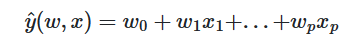

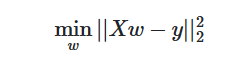

In [210]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import skew
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from yellowbrick.regressor import PredictionError, ResidualsPlot
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (12, 8)
print("libraries imported..")

libraries imported..


In [211]:
df = pd.read_csv("Advertising.csv")
df.head()


,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [212]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [213]:
df.duplicated().sum()

np.int64(0)

In [214]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [216]:
df.drop(df.columns[[0]], axis = 1, inplace = True) 

In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [218]:
df['sales']

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [219]:
df.TV.corr(df.sales)

np.float64(0.7822244248616061)

In [220]:

df.radio.corr(df.sales)

np.float64(0.5762225745710551)

In [221]:
df.newspaper.corr(df.sales)

np.float64(0.22829902637616528)

In [222]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


# Анализ матрицы корреляции

- TV - самая большая корреляция 0.78, увеличение затрат на тв-рекламу сильно связано с увеличением продаж
- На втором месте радио - 0.58
- У газет минимальный показатель - 0.23 - имеет слабый эффект на продажи

<Axes: >

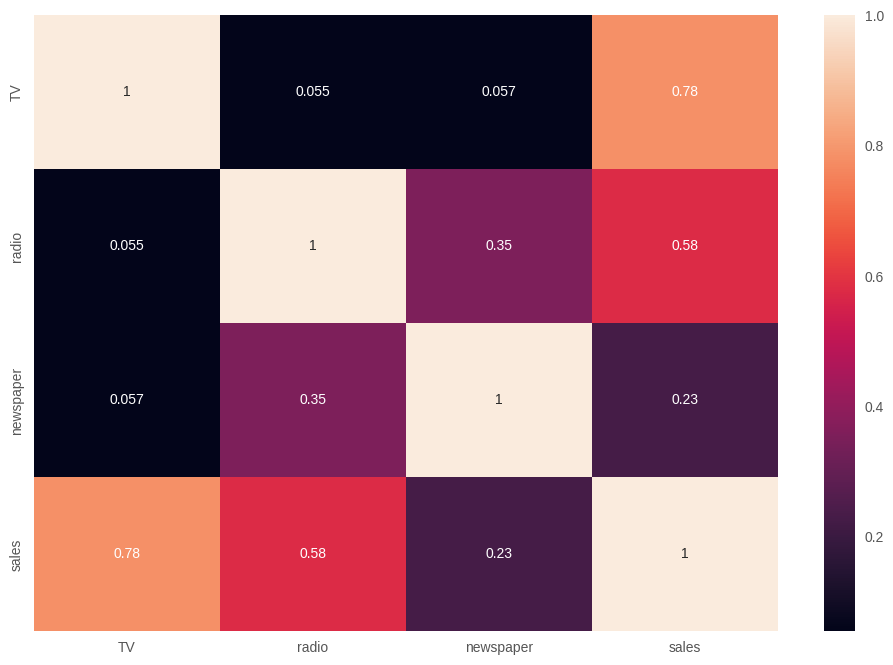

In [223]:
sns.heatmap(df.corr(),annot=True)

In [224]:
X = df[['newspaper']]
X.head()

,newspaper
0,69.2
1,45.1
2,69.3
3,58.5
4,58.4


M = 10
X_base = df[['newspaper']].copy()
for i in range(2,M+1):
    X_base['newspaper']*= X_base['newspaper']
    

In [225]:
# обозначаем целевую переменную
y = df.sales
type(y)

pandas.core.series.Series

In [226]:
# Разбиваем на обучающую и тестовую выборки

# random_state = 1
# фиксирует случайность разбиения, чтобы при каждом запуске получались одинаковые обучающие и тестовые выборки.
X_train,X_test, y_train, y_test = train_test_split(X, y, random_state=1)


In [227]:
lr_m0 = LinearRegression() # Создаём модель
lr_m0.fit(X_train, y_train) # Обучаем
# Другими словами подбираем коэффициенты линейной регресии, минимизируя MSE

LinearRegression()

In [228]:
print(lr_m0.intercept_) # свободный член уравнения регрессии 
print(lr_m0.coef_) # веса

11.765576707409686
[0.06888299]


In [229]:
# исходя из коэффицентов
# увеличение расходов на 1 (для газет) связано с увеличением выручки на 0.068

In [230]:
y_pred = lr_m0.predict(X_test) # делаем предсказание на тестовой выборке
y_pred[:5] 

array([14.36246531, 13.94227909, 12.27531081, 13.23967263, 13.83206631])

In [231]:
mean_squared_error(y_test, y_pred) # MSE

25.196780034607823

In [232]:
from sklearn.preprocessing import maxabs_scale
X = df[['newspaper']].copy()

X_maxabs = maxabs_scale(X, axis=0) # масштабируем признак, не меняем распределение
# просто масштабирование - (X = X/X_max)

In [233]:
X_maxabs

array([[0.60701754],
       [0.39561404],
       [0.60789474],
       [0.51315789],
       [0.5122807 ],
       [0.65789474],
       [0.20614035],
       [0.10175439],
       [0.00877193],
       [0.18596491],
       [0.2122807 ],
       [0.03508772],
       [0.57807018],
       [0.06315789],
       [0.40350877],
       [0.46403509],
       [1.        ],
       [0.48947368],
       [0.16052632],
       [0.16754386],
       [0.46842105],
       [0.20614035],
       [0.43508772],
       [0.22982456],
       [0.16052632],
       [0.17105263],
       [0.11052632],
       [0.20087719],
       [0.20087719],
       [0.35789474],
       [0.37894737],
       [0.33859649],
       [0.26315789],
       [0.00263158],
       [0.06491228],
       [0.0745614 ],
       [0.04385965],
       [0.40087719],
       [0.30789474],
       [0.28070175],
       [0.27719298],
       [0.33947368],
       [0.01578947],
       [0.23157895],
       [0.37982456],
       [0.27631579],
       [0.31315789],
       [0.162

In [234]:
from sklearn.preprocessing import PolynomialFeatures

# Создаём объект полиномиальных признаков степени 2 
# Если в X - один признак, то мы получаем [1, X, X²]

# Обычно такие преобразования с данными делают для того чтобы 
# добится лучшего показателя коэфф Пирсона - корреляции
poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(X_maxabs) # Преобразуем данные

X_poly

array([[1.00000000e+00, 6.07017544e-01, 3.68470299e-01],
       [1.00000000e+00, 3.95614035e-01, 1.56510465e-01],
       [1.00000000e+00, 6.07894737e-01, 3.69536011e-01],
       [1.00000000e+00, 5.13157895e-01, 2.63331025e-01],
       [1.00000000e+00, 5.12280702e-01, 2.62431517e-01],
       [1.00000000e+00, 6.57894737e-01, 4.32825485e-01],
       [1.00000000e+00, 2.06140351e-01, 4.24938443e-02],
       [1.00000000e+00, 1.01754386e-01, 1.03539551e-02],
       [1.00000000e+00, 8.77192982e-03, 7.69467528e-05],
       [1.00000000e+00, 1.85964912e-01, 3.45829486e-02],
       [1.00000000e+00, 2.12280702e-01, 4.50630963e-02],
       [1.00000000e+00, 3.50877193e-02, 1.23114805e-03],
       [1.00000000e+00, 5.78070175e-01, 3.34165128e-01],
       [1.00000000e+00, 6.31578947e-02, 3.98891967e-03],
       [1.00000000e+00, 4.03508772e-01, 1.62819329e-01],
       [1.00000000e+00, 4.64035088e-01, 2.15328563e-01],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 4.89473

### Повторяем эксперимент, но уже с преобразованными значениями

In [235]:
X_train, X_test, y_train, y_test = train_test_split(X_poly,y, random_state=1)

In [236]:
lr_poly = LinearRegression()
lr_poly.fit(X_train, y_train)

LinearRegression()

In [237]:
print(lr_poly.intercept_)
print(lr_poly.coef_)

12.441580506501381
[0.         1.37334018 9.84961912]


In [238]:
y_pred = lr_poly.predict(X_test) 
mean_squared_error(y_test, y_pred)

26.806701556925386

## Гребневая регрессия

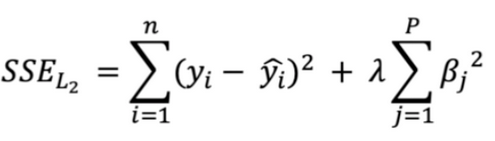

- Первая сумма - обычная MSE
- Вторая сумма - пенальти (регуляризация). Она штрафует за большие коэффициенты.

- alpha - коэфф гребневой регресси. alpha=0 - обычная гребневая регрессия

#### Смысл регуляризации

- Обычная линейная регрессия может давать слишком большие коэфф., особенно при мультиколлинеарности.
- Большие коэффициенты - чувствительность к шуму в данных. Переобучение..
- Регуляризация в данном случае уменьшает коэффициенты, но не полностью обнуляет их.
- Ridge снижает вероятность переобучения, сглаживая экстремальные веса.

Принцип работы пенальти по формуле - увеличение MSE, в соотв размерности коэффициента.


In [239]:
from sklearn.linear_model import Ridge
lr_ridge = Ridge(alpha=1.0)
lr_ridge.fit(X_train, y_train)

Ridge()

In [240]:
print(lr_ridge.intercept_)
print(lr_ridge.coef_)
# Если сравними результат с предыдущим - увидим огромную разницу: один коэфф упал (с 9 до 4)- другой поднялся (с 1 до 4)

12.267941747587823
[0.         4.25508987 4.23190934]


In [241]:
y_pred = lr_ridge.predict(X_test) 
mean_squared_error(y_test, y_pred)

25.379015302641687

# SVR - support vector regression
регрессия опорных векторов

- В отличие от обычной линейной регрессии, SVR пытается найти оптимальную границу, 
в пределах которой ошибки считаются несущественными.

SVR минимизирует следующую функцию: 

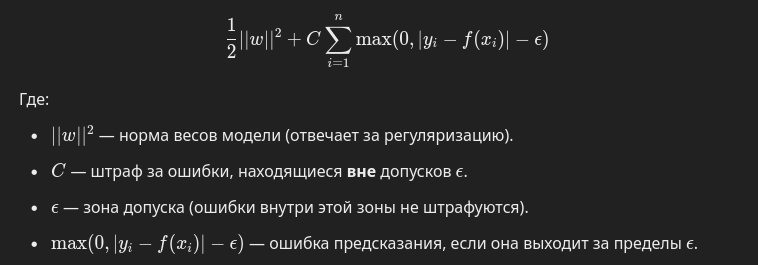

- SVR не минимизирует MSE, как линейная регрессия, а использует допуск ϵϵ.
- Если разница между предсказанным значением и реальным меньше ϵϵ, модель игнорирует ошибку.
- Только ошибки больше ϵϵ штрафуются с коэффициентом CC.
- Веса модели выбираются так, чтобы минимизировать их норму (делая модель устойчивой).

# kernel="rbf" – использует радиальную базисную функцию (RBF)
это позволяет модели находить нелинейные зависимости

In [242]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)

In [243]:
svr_rbf.fit(X_train, y_train)

SVR(C=100, gamma=0.1)

In [244]:
y_pred = svr_rbf.predict(X_test)

In [245]:
mean_squared_error(y_test, y_pred)

30.608529874857656

### kernel='linear' – модель использует линейную зависимость между признаками. 

- В этом случае SVR работает как обычная линейная регрессия, но с зоной допуска ϵϵ.

In [246]:
svr_linear = SVR(kernel = 'linear', C=100, epsilon=0.1)

In [247]:
svr_linear.fit(X_train, y_train)

SVR(C=100, kernel='linear')

In [248]:
y_pred = svr_linear.predict(X_test)
mean_squared_error(y_test, y_pred)

31.301176466896894

In [249]:
#Задачи: Линейная регрессия
# 1. Разработать модель линейной регрессии, учитывающей все (в примере),2,3 столбца входных переменных. Рассчитать MSE. 
# Вывести значения коэффициентов модели.

# 2. Разработать модель линейной регрессии, базисные функции - полином от исходных значений. Найти зависимость MSE от
# максимальной степени полинома. (max_pow <= 10)

# 3. Регуляризация. Гребневая регрессия. Выбрать оптимальную степень полинома, 
# построить график зависимости максимального модуля параметров, MSE 
# от величины alpha.


# 4. Регуляризация. Лассо. Выбрать оптимальную степень полинома, 
# построить график зависимости максимального модуля параметров, MSE 
# от величины alpha. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html
# linear_model.Lasso(alpha=0.1)

In [250]:
#SVR
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#sklearn.svm.SVR
# Исследовать точность модели регрессии при применении  ядерных функций 'poly', 'sigmoid'
# Реализовать модель SVRб учитывающую все характеристики исходных данных, выбрать модель с оптимальными параметрами.

# РЕШЕНИЕ

In [251]:
# 1. Разработать модель линейной регрессии, учитывающей все (в примере),2,3 столбца входных переменных. Рассчитать MSE.
# Вывести значения коэффициентов модели.

X = df[['TV', 'radio', 'newspaper']]
y = df['sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

lr = LinearRegression()
lr.fit(X_train, y_train)

print("Intercept:", lr.intercept_)
print("Coefficients:", lr.coef_)

y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)


Intercept: 2.8769666223179318
Coefficients: [0.04656457 0.17915812 0.00345046]
MSE: 1.9730456202283377


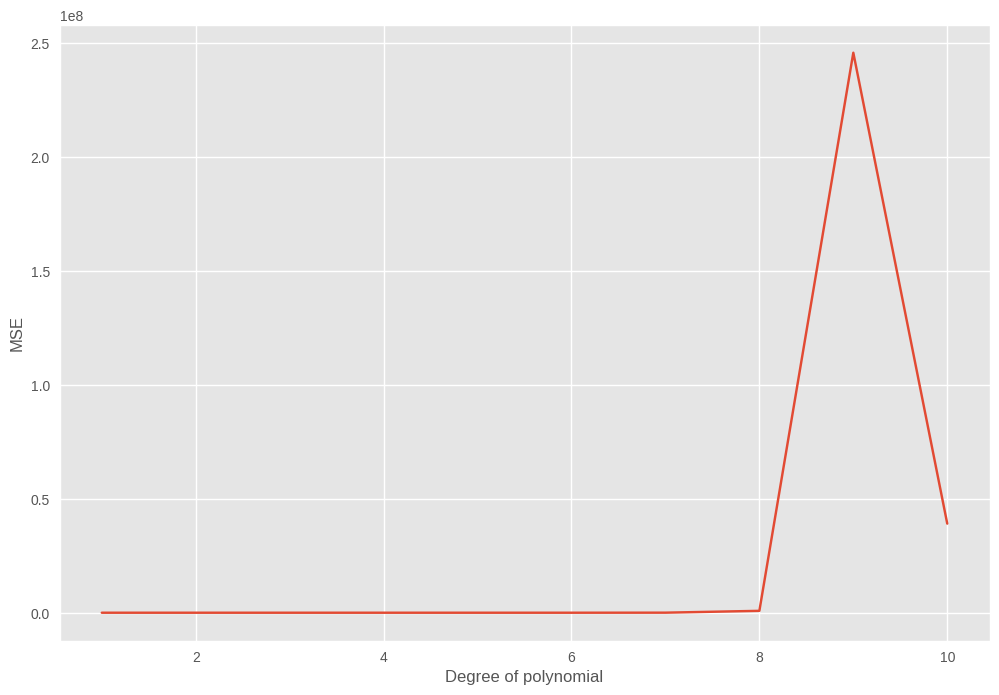

In [252]:
# 2. Разработать модель линейной регрессии, базисные функции - полином от исходных значений. Найти зависимость MSE от
# максимальной степени полинома. (max_pow <= 10)

from sklearn.preprocessing import PolynomialFeatures

## Список для хранения значений MSE для каждой степени полинома
mse_list = []
pows = range(1, 11)

for degree in pows:
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state=1)

    lr = LinearRegression()
    lr.fit(X_train, y_train)

    y_pred = lr.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)

    mse_list.append(mse)

plt.plot(pows, mse_list)
plt.xlabel('Degree of polynomial')
plt.ylabel('MSE')
plt.show()

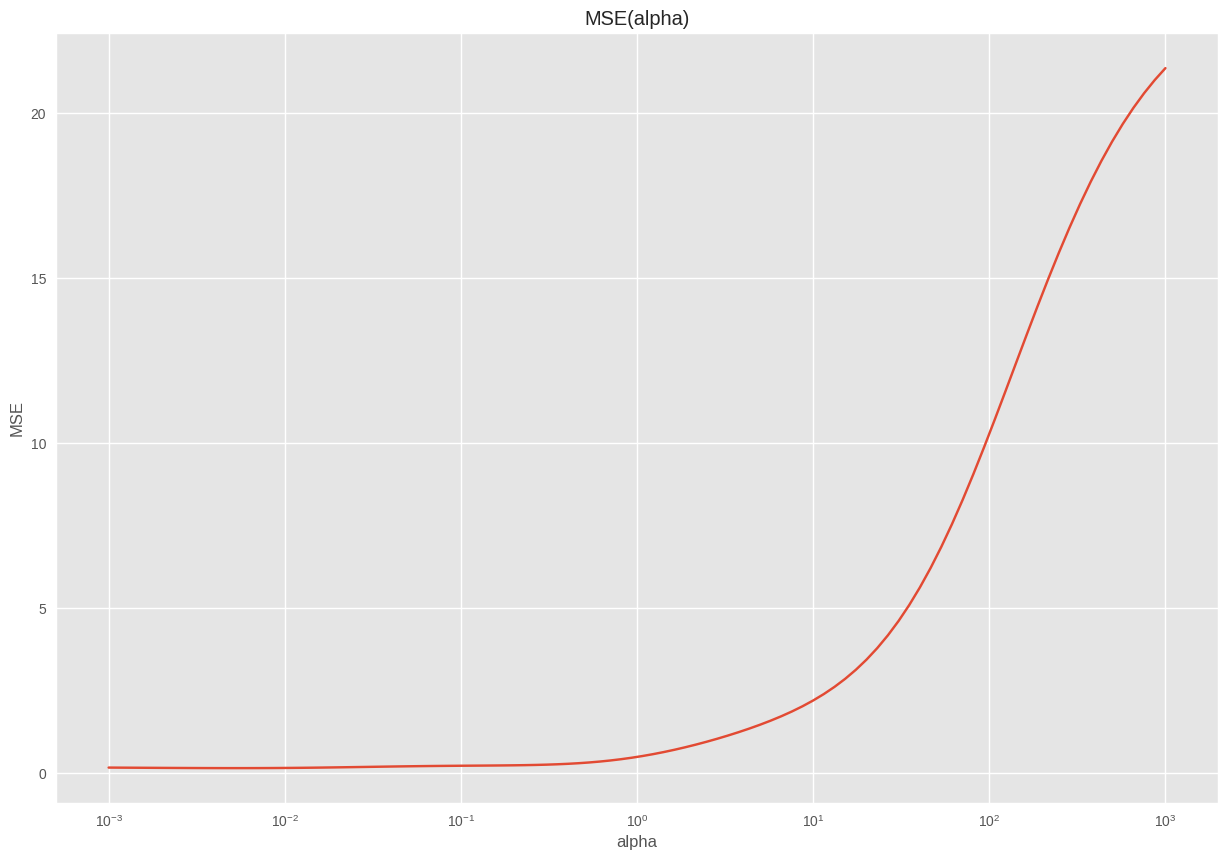

In [253]:
# 3. Регуляризация. Гребневая регрессия. 
# Выбрать оптимальную степень полинома, 
# построить график зависимости максимального модуля параметров, 
# MSE от величины alpha.

from sklearn.linear_model import Ridge
from sklearn.preprocessing import maxabs_scale

X = df[['TV', 'radio', 'newspaper']]
y = df['sales']

# Генерация значений alpha в логарифмическом масштабе от 10^-3 до 10^3
alpha = np.logspace(-3, 3, 100)

mseRidge = []
max_coef_ridge = []

degree = 3
polinom = PolynomialFeatures(degree=degree)
X_polinom = polinom.fit_transform(X)

# масштабируем значения
X_polinom = maxabs_scale(X_polinom, axis=0)

X_train, X_test, y_train, y_test = train_test_split(X_polinom, y, random_state=1)

for a in alpha:
    model = Ridge(alpha=a)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    mseRidge.append(mean_squared_error(y_pred, y_test))

    max_coef_ridge.append(np.max(np.abs(model.coef_)))


plt.figure(figsize=(15, 10))
plt.plot(alpha, mseRidge)
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.title('MSE(alpha)')
plt.show()

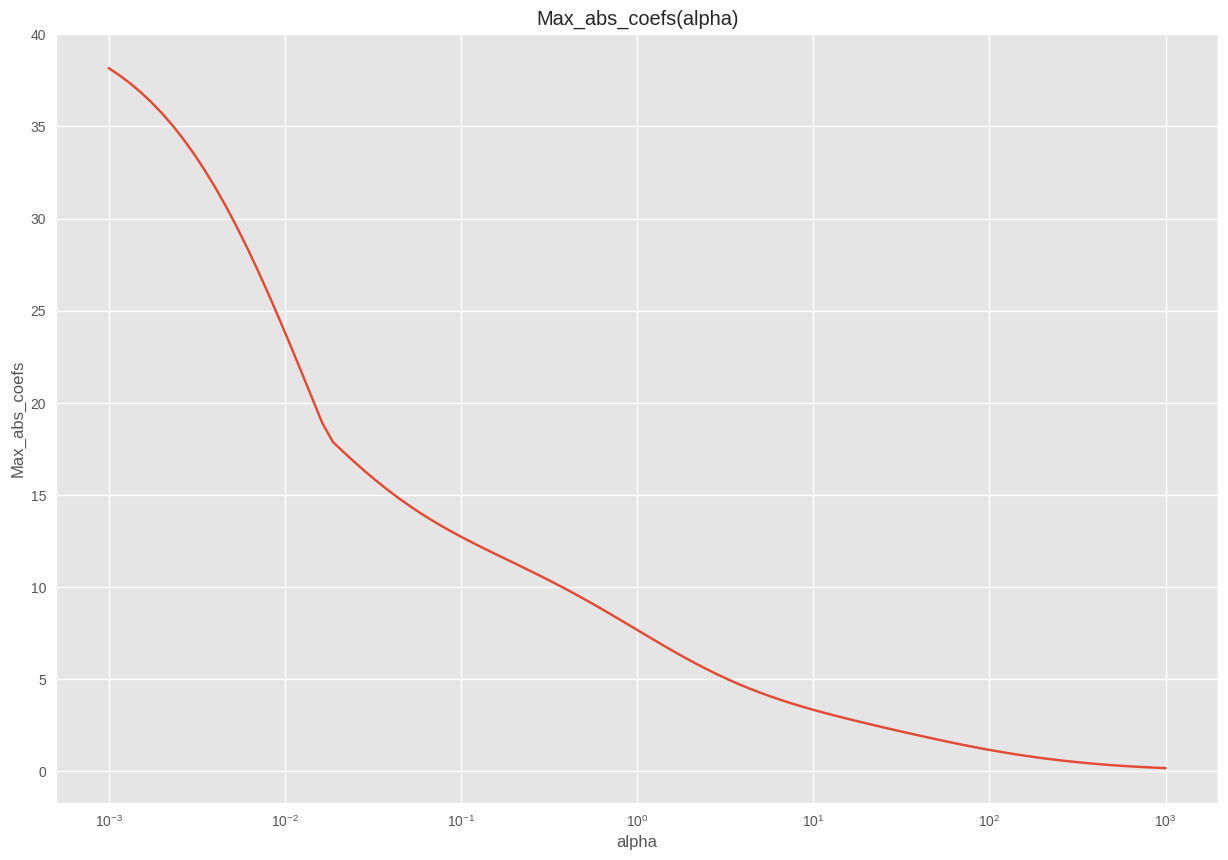

In [254]:
plt.figure(figsize=(15, 10))
plt.plot(alpha, max_coef_ridge)
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('Max_abs_coefs')
plt.title('Max_abs_coefs(alpha)')
plt.show()

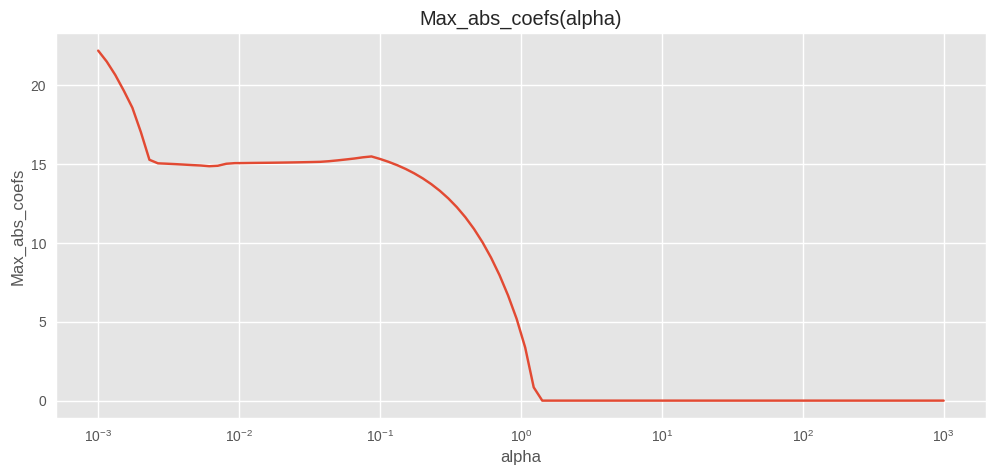

In [255]:
# 4. Регуляризация. Лассо. Выбрать оптимальную степень полинома, 
# построить график зависимости максимального модуля параметров, MSE 
# от величины alpha. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html
# linear_model.Lasso(alpha=0.1)

from sklearn.linear_model import Lasso

X = df[['TV', 'radio', 'newspaper']]
y = df['sales']

# Генерация значений alpha в логарифмическом масштабе от 10^-3 до 10^3
alpha = np.logspace(-3, 3, 100)

max_coeff_list = []
mse_list = []

degree = 3
polinom = PolynomialFeatures(degree=degree)
X_polinom = polinom.fit_transform(X)

# масштабируем значения
X_polinom = maxabs_scale(X_polinom, axis=0)

X_train, X_test, y_train, y_test = train_test_split(X_polinom, y, random_state=1)

for alpha in alpha_values:
    lasso = Lasso(alpha=alpha, max_iter=20000)
    lasso.fit(X_train, y_train)

    max_coeff = np.max(lasso.coef_)
    max_coeff_list.append(np.abs(max_coeff))

    y_pred = lasso.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)


plt.figure(figsize=(12, 5))
plt.plot(alpha_values, max_coeff_list)
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('Max_abs_coefs')
plt.title('Max_abs_coefs(alpha)')
plt.show()

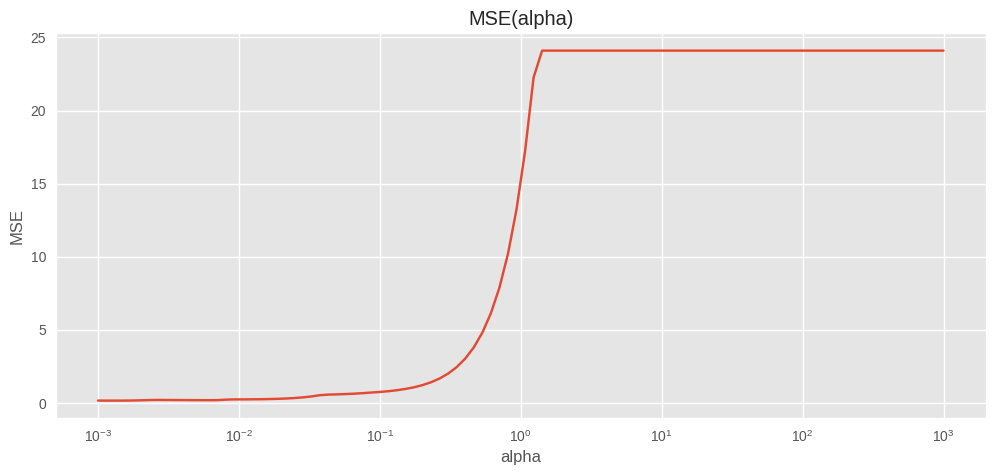

In [256]:
plt.figure(figsize=(12, 5))
plt.plot(alpha_values, mse_list)
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.title('MSE(alpha)')
plt.show()

In [258]:
# Исследовать точность модели регрессии при применении  ядерных функций 'poly', 'sigmoid'
# Реализовать модель SVRб учитывающую все характеристики исходных данных, выбрать модель с оптимальными параметрами.

from sklearn.svm import SVR

X = df[['TV', 'radio', 'newspaper']]
y = df['sales']

# масштабируем значения
X = maxabs_scale(X, axis=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


svr_poly = SVR(kernel='poly', degree=3)  
svr_sigmoid = SVR(kernel='sigmoid')

svr_poly.fit(X_train, y_train)
svr_sigmoid.fit(X_train, y_train)

y_pred_poly = svr_poly.predict(X_test)
y_pred_sigmoid = svr_sigmoid.predict(X_test)

mse_poly = mean_squared_error(y_test, y_pred_poly)
mse_sigmoid = mean_squared_error(y_test, y_pred_sigmoid)

r2_poly = r2_score(y_test, y_pred_poly)
r2_sigmoid = r2_score(y_test, y_pred_sigmoid)

print(f"SVR with 'poly' kernel - MSE: {mse_poly}, R^2: {r2_poly}")
print(f"SVR with 'sigmoid' kernel - MSE: {mse_sigmoid}, R^2: {r2_sigmoid}")

SVR with 'poly' kernel - MSE: 2.6737347602296655, R^2: 0.8856559134830755
SVR with 'sigmoid' kernel - MSE: 132.18133253076826, R^2: -4.652824636024212


POLY
- MSE: 2.67 — Это довольно низкое значение для среднеквадратичной ошибки.

Это говорит о хорошем качестве модели, так как она хорошо предсказывает значения.

- R^2: 0.89 — Это значение близко к 1, что означает, что модель объясняет около 89% дисперсии в данных. 

Это очень хороший результат для задачи регрессии, указывающий на то, что модель успешно предсказывает зависимость между признаками и целевой переменной.

SIGMOID

- MSE: 132.18 — значительно более высокое значение. 

Это указывает на то, что модель с ядром 'sigmoid' работает значительно хуже, чем модель с ядром 'poly'. 

Ошибка предсказания в разы выше.


- R^2: -4.65 — Отрицательное значение R^2 говорит о том, что модель с ядром 'sigmoid' настолько плохо предсказывает данные, что она даже хуже, чем просто усреднение переменной (что дало бы R^2 равное 0). 

Это очень плохой результат и указывает на то, что ядро 'sigmoid' совершенно не подходит для данной задачи.